In [2]:
import config
from src import load_data

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')

In [3]:
data = load_data(config.RAW_DATA_FILE)

Données chargées avec succès.


In [4]:
data['date'] = pd.to_datetime(data['date'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

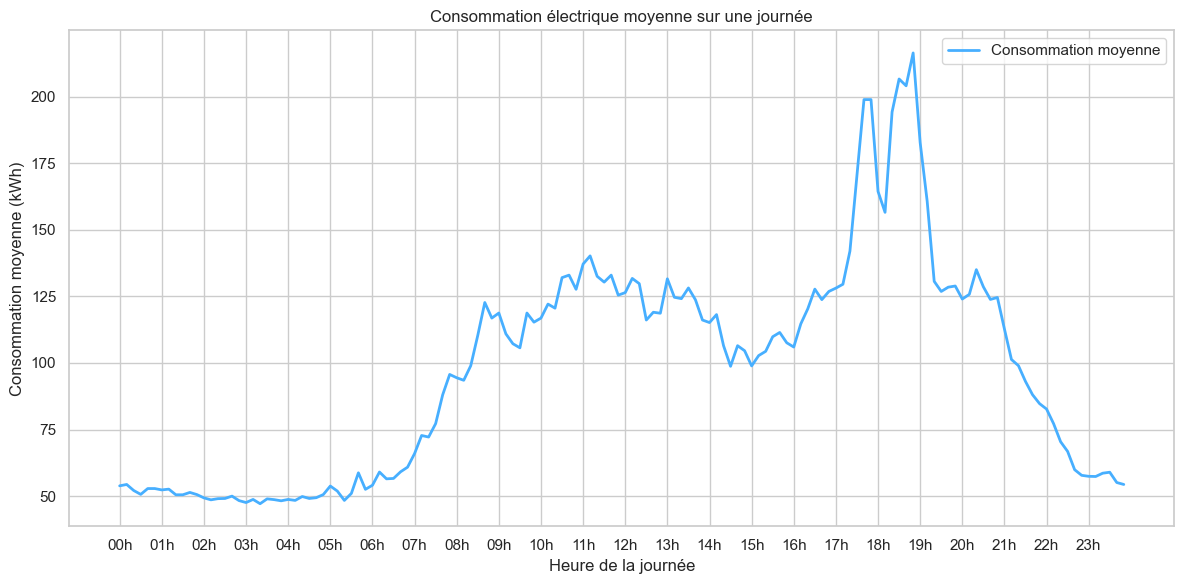

In [6]:
moyennes = data.groupby(data['date'].dt.time)['Appliances'].mean()
moyennes.index = moyennes.index.astype(str)

hours = [t for t in moyennes.index if t.endswith(':00:00')]
hours_labels = [x.split(':')[0]+'h' for x in hours]

plt.figure(figsize=(12, 6))

plt.plot(moyennes.index, moyennes.values, label='Consommation moyenne', linewidth=2, color='#47afff')

plt.xlabel('Heure de la journée')
plt.ylabel('Consommation moyenne (kWh)')
plt.title('Consommation électrique moyenne sur une journée', )
plt.xticks(hours, hours_labels)

plt.legend()
plt.tight_layout()
plt.show()

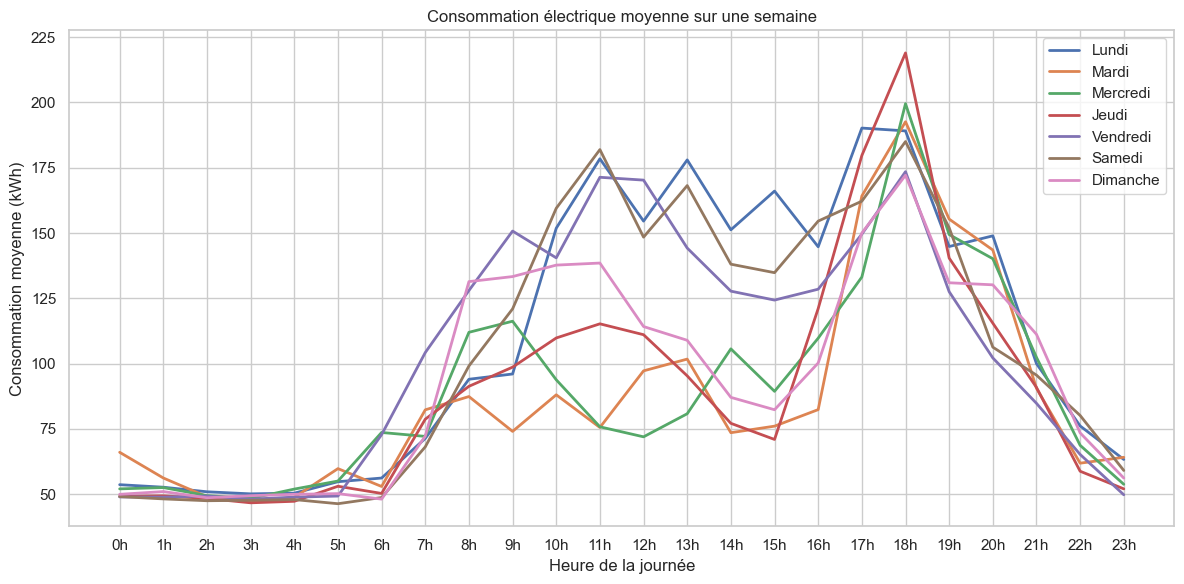

In [7]:
import matplotlib.pyplot as plt

# Extraire le jour de la semaine et l'heure
data['jour_semaine'] = data['date'].dt.weekday  # 0 pour lundi, 6 pour dimanche
data['heure'] = data['date'].dt.hour

# Grouper par jour de la semaine et heure
moyennes_semaine = data.groupby(['jour_semaine', 'heure'])['Appliances'].mean().unstack()

# Affichage des jours de la semaine
jours_labels = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
heures = moyennes_semaine.columns

# Tracer les courbes
plt.figure(figsize=(12, 6))

for jour in range(7):
    plt.plot(heures, moyennes_semaine.loc[jour], label=jours_labels[jour], linewidth=2)

plt.xlabel('Heure de la journée')
plt.ylabel('Consommation moyenne (kWh)')
plt.title('Consommation électrique moyenne sur une semaine')
plt.xticks(heures, [f'{x}h' for x in heures])

plt.legend()
plt.tight_layout()
plt.show()

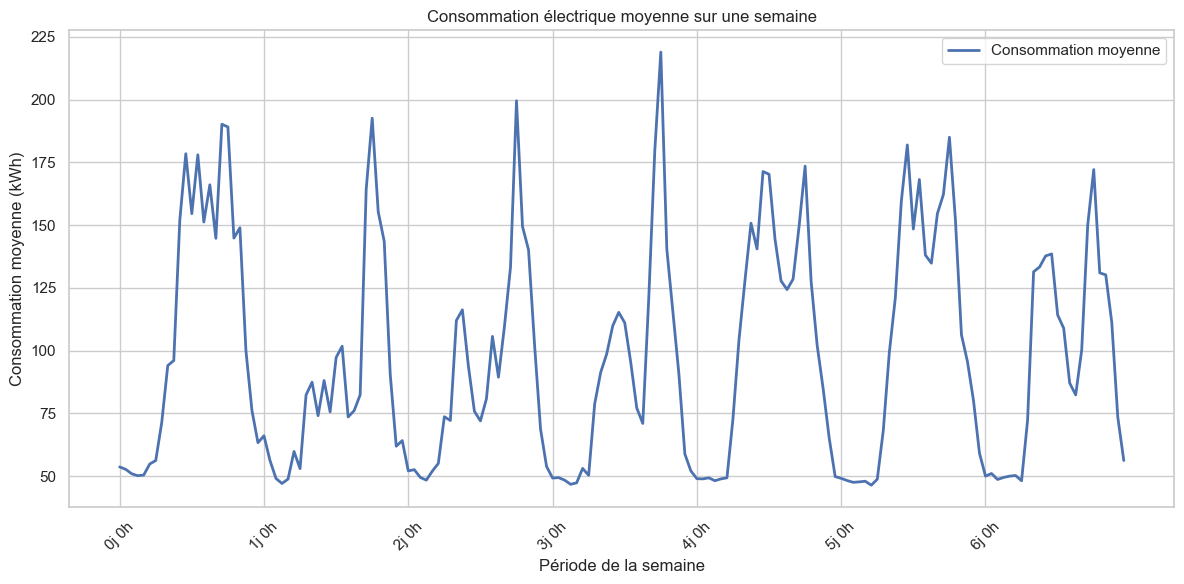

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Ajouter une colonne avec la période de temps sur la semaine (timestamp)
data['jour_semaine'] = data['date'].dt.weekday  # 0 pour lundi, 6 pour dimanche
data['heure'] = data['date'].dt.hour

# Créer une colonne représentant la période de temps sur la semaine (combinaison du jour et de l'heure)
data['temps_semaine'] = data['jour_semaine'] * 24 + data['heure']  # Compter les heures depuis le début de la semaine

# Calculer la consommation moyenne pour chaque période de la semaine
moyennes_semaine = data.groupby('temps_semaine')['Appliances'].mean()

# Créer l'axe des abscisses comme une période de temps continue (de 0 à 167 pour 7 jours, 24 heures par jour)
temps_labels = [f"{i//24}j {i%24}h" for i in moyennes_semaine.index]

# Tracer le graphique
plt.figure(figsize=(12, 6))

plt.plot(moyennes_semaine.index, moyennes_semaine.values, label='Consommation moyenne', linewidth=2)

# Ajouter des labels et un titre
plt.xlabel('Période de la semaine')
plt.ylabel('Consommation moyenne (kWh)')
plt.title('Consommation électrique moyenne sur une semaine')

# Personnaliser l'affichage des ticks sur l'axe des x
plt.xticks(moyennes_semaine.index[::24], temps_labels[::24], rotation=45)  # Afficher les labels tous les 24 indices (pour chaque jour)

plt.legend()
plt.tight_layout()
plt.show()

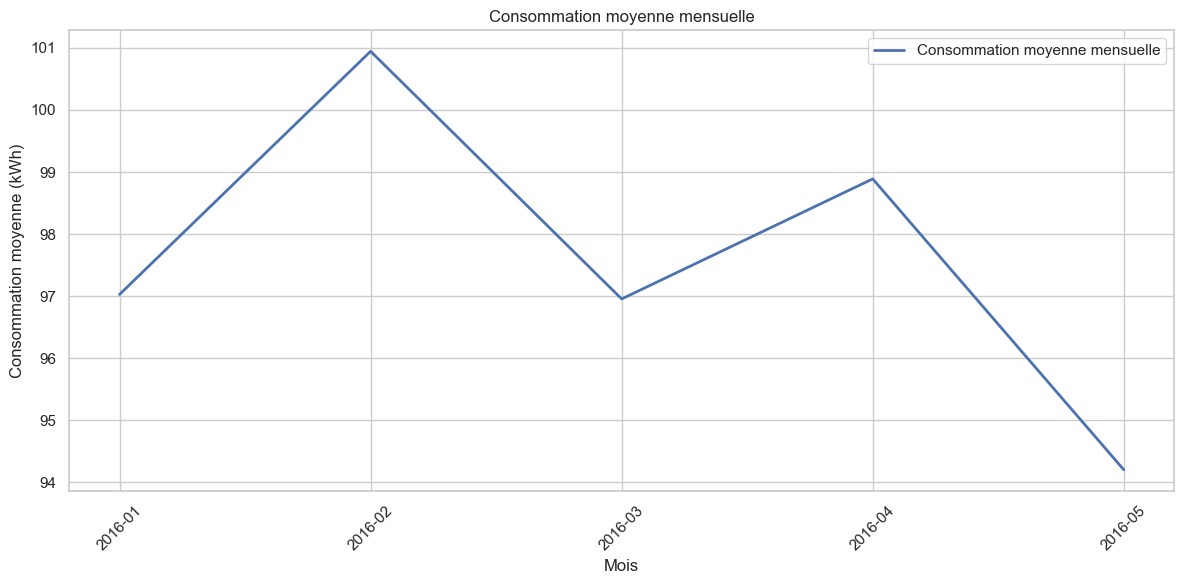

In [9]:
import matplotlib.pyplot as plt

# Assurez-vous que la colonne 'date' est au format datetime (si nécessaire)
data['date'] = pd.to_datetime(data['date'])

# Extraire l'année et le mois
data['mois'] = data['date'].dt.to_period('M')  # Extrait le mois sous forme d'une période (ex : 2025-01)

# Calculer la consommation moyenne par mois
moyennes_mensuelles = data.groupby('mois')['Appliances'].mean()

# Tracer la consommation moyenne par mois
plt.figure(figsize=(12, 6))

plt.plot(moyennes_mensuelles.index.astype(str), moyennes_mensuelles.values, label='Consommation moyenne mensuelle', linewidth=2)

# Ajouter des labels et un titre
plt.xlabel('Mois')
plt.ylabel('Consommation moyenne (kWh)')
plt.title('Consommation moyenne mensuelle')

# Option pour améliorer la lisibilité des dates
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()

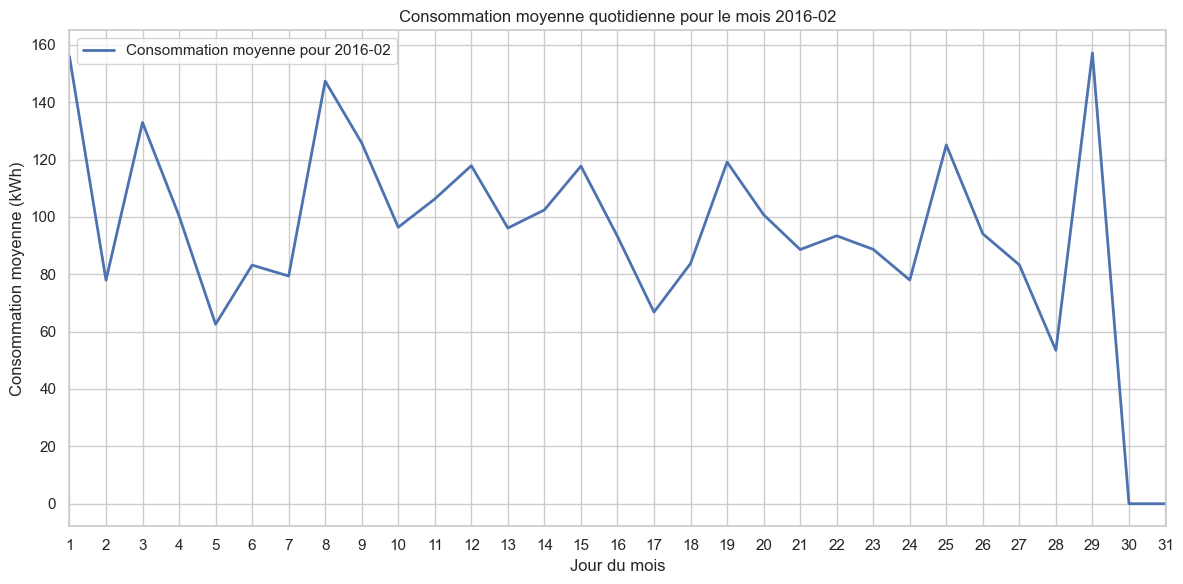

In [10]:
import matplotlib.pyplot as plt

# Assurez-vous que la colonne 'date' est au format datetime (si nécessaire)
data['date'] = pd.to_datetime(data['date'])

# Extraire l'année, le mois, et le jour du mois
data['mois'] = data['date'].dt.to_period('M')
data['jour'] = data['date'].dt.day

# Calculer la consommation moyenne pour chaque jour du mois
moyennes_journalières = data.groupby(['mois', 'jour'])['Appliances'].mean().unstack(fill_value=0)

# Choisir un mois spécifique (par exemple, le premier mois dans les données)
mois_selectionne = moyennes_journalières.index[1]

# Tracer la consommation moyenne pour ce mois
plt.figure(figsize=(12, 6))

plt.plot(moyennes_journalières.columns, moyennes_journalières.loc[mois_selectionne], label=f'Consommation moyenne pour {mois_selectionne}', linewidth=2)

# Ajouter des labels et un titre
plt.xlabel('Jour du mois')
plt.ylabel('Consommation moyenne (kWh)')
plt.title(f'Consommation moyenne quotidienne pour le mois {mois_selectionne}')

# Option pour améliorer la lisibilité des dates
plt.xticks(range(1, 32))  # Afficher tous les jours du mois (1 à 31)
plt.xlim(1, 31)  # Limiter l'axe des x à 31 jours (s'il y en a moins, certains jours seront vides)

plt.legend()
plt.tight_layout()
plt.show()

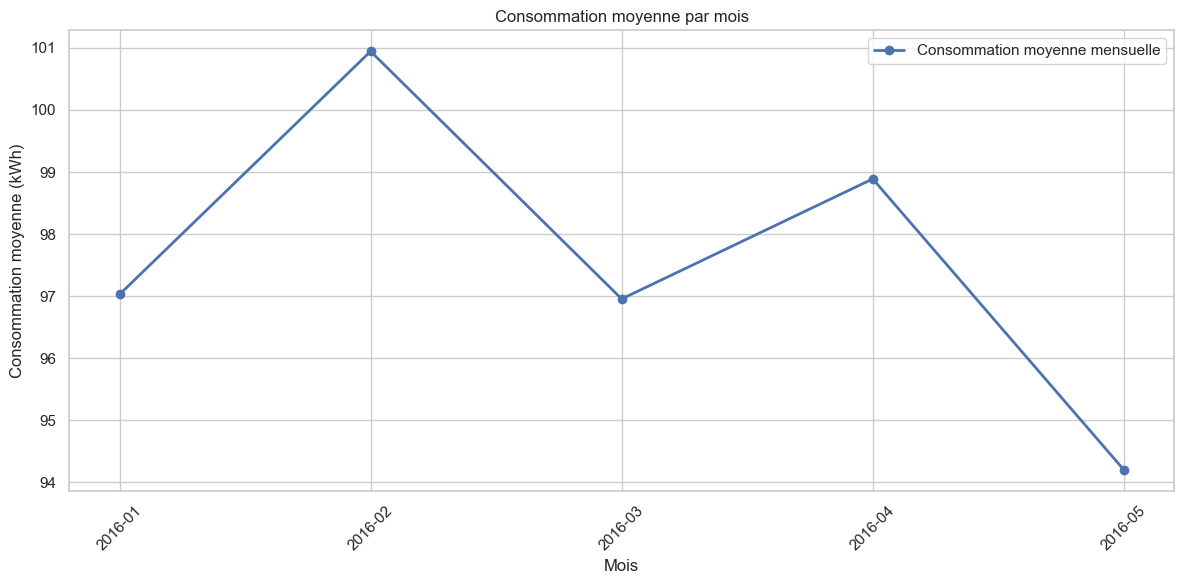

In [11]:
import matplotlib.pyplot as plt

# Assurez-vous que la colonne 'date' est au format datetime (si nécessaire)
data['date'] = pd.to_datetime(data['date'])

# Extraire l'année et le mois
data['mois'] = data['date'].dt.to_period('M')  # Extrait le mois sous forme de période (ex : 2025-01)

# Calculer la consommation moyenne par mois
moyennes_mensuelles = data.groupby('mois')['Appliances'].mean()

# Tracer la consommation moyenne par mois
plt.figure(figsize=(12, 6))

plt.plot(moyennes_mensuelles.index.astype(str), moyennes_mensuelles.values, label='Consommation moyenne mensuelle', marker='o', linewidth=2)

# Ajouter des labels et un titre
plt.xlabel('Mois')
plt.ylabel('Consommation moyenne (kWh)')
plt.title('Consommation moyenne par mois')

# Option pour améliorer la lisibilité des dates
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()

/var/folders/b_/ysnxfskx5fgbfx24s4__pj_h0000gn/T/ipykernel_6205/1562951938.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mois['heure'] = data_mois['date'].dt.hour


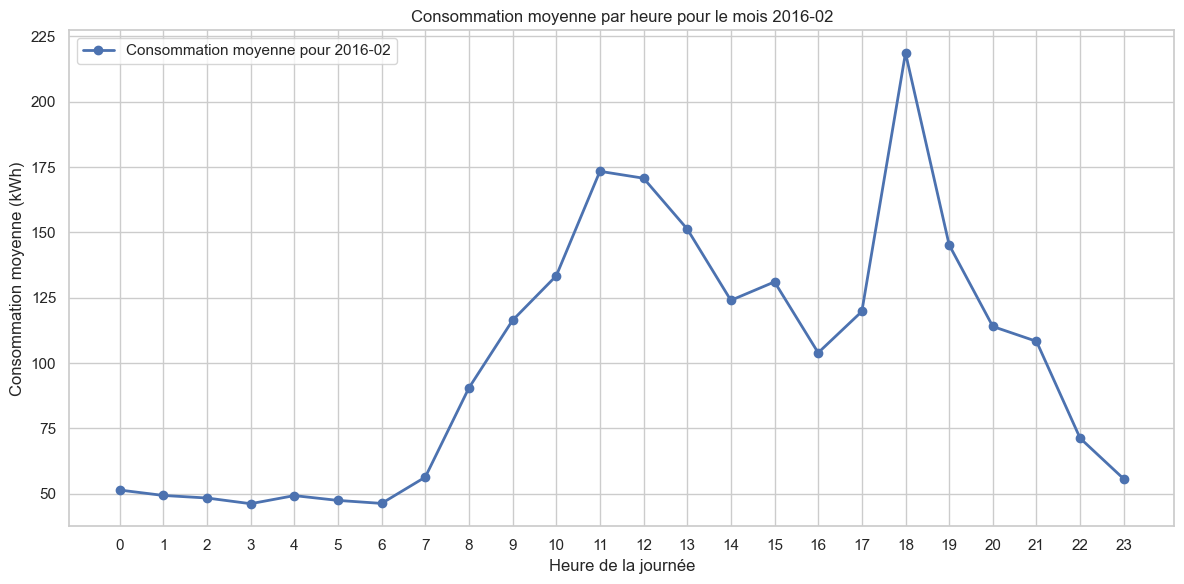

In [12]:
import matplotlib.pyplot as plt

# Assurez-vous que la colonne 'date' est au format datetime (si nécessaire)
data['date'] = pd.to_datetime(data['date'])

# Sélectionner un mois spécifique (par exemple, le mois de janvier 2025)
mois_selectionne = '2016-02'

# Filtrer les données pour le mois sélectionné
data_mois = data[data['date'].dt.to_period('M') == mois_selectionne]

# Extraire l'heure de la journée
data_mois['heure'] = data_mois['date'].dt.hour

# Calculer la consommation moyenne par heure pour ce mois
moyenne_par_heure = data_mois.groupby('heure')['Appliances'].mean()

# Tracer la consommation moyenne par heure
plt.figure(figsize=(12, 6))

plt.plot(moyenne_par_heure.index, moyenne_par_heure.values, label=f'Consommation moyenne pour {mois_selectionne}', marker='o', linewidth=2)

# Ajouter des labels et un titre
plt.xlabel('Heure de la journée')
plt.ylabel('Consommation moyenne (kWh)')
plt.title(f'Consommation moyenne par heure pour le mois {mois_selectionne}')

# Afficher les heures sur l'axe des x
plt.xticks(range(24))

plt.legend()
plt.tight_layout()
plt.show()

- Conso sur toute la période
- Conso sur une semaine (moyenne)
- Conso sur une journée (moyenne)
- Matrice de corrélation
- Evolution température/humidité sur un jour/semaine (moyenne) sur toute la période
- Evolution données station météo